In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("BreastCancer.csv")

In [7]:
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


# Decision tree Classification

In [8]:
x=data.iloc[:,:9]
y=data.iloc[:,9]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
clt=DecisionTreeClassifier()
clt.fit(x_train,y_train)

DecisionTreeClassifier()

### Visualizing tree

In [12]:
text_representation=export_text(clt)
print(text_representation)
# feature 1,2,3,4... -> features (cols) of the dataset

|--- feature_2 <= 96.50
|   |--- feature_7 <= 10.64
|   |   |--- feature_1 <= 20.48
|   |   |   |--- class: 2
|   |   |--- feature_1 >  20.48
|   |   |   |--- feature_7 <= 3.28
|   |   |   |   |--- class: 2
|   |   |   |--- feature_7 >  3.28
|   |   |   |   |--- feature_4 <= 2.65
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  2.65
|   |   |   |   |   |--- feature_3 <= 13.31
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_3 >  13.31
|   |   |   |   |   |   |--- feature_5 <= 36.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  36.56
|   |   |   |   |   |   |   |--- class: 2
|   |--- feature_7 >  10.64
|   |   |--- feature_1 <= 30.03
|   |   |   |--- feature_8 <= 919.35
|   |   |   |   |--- class: 2
|   |   |   |--- feature_8 >  919.35
|   |   |   |   |--- feature_5 <= 18.20
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  18.20
|   |   |   |   |   |--- class: 2
|   |   |--- feature_1 >  30

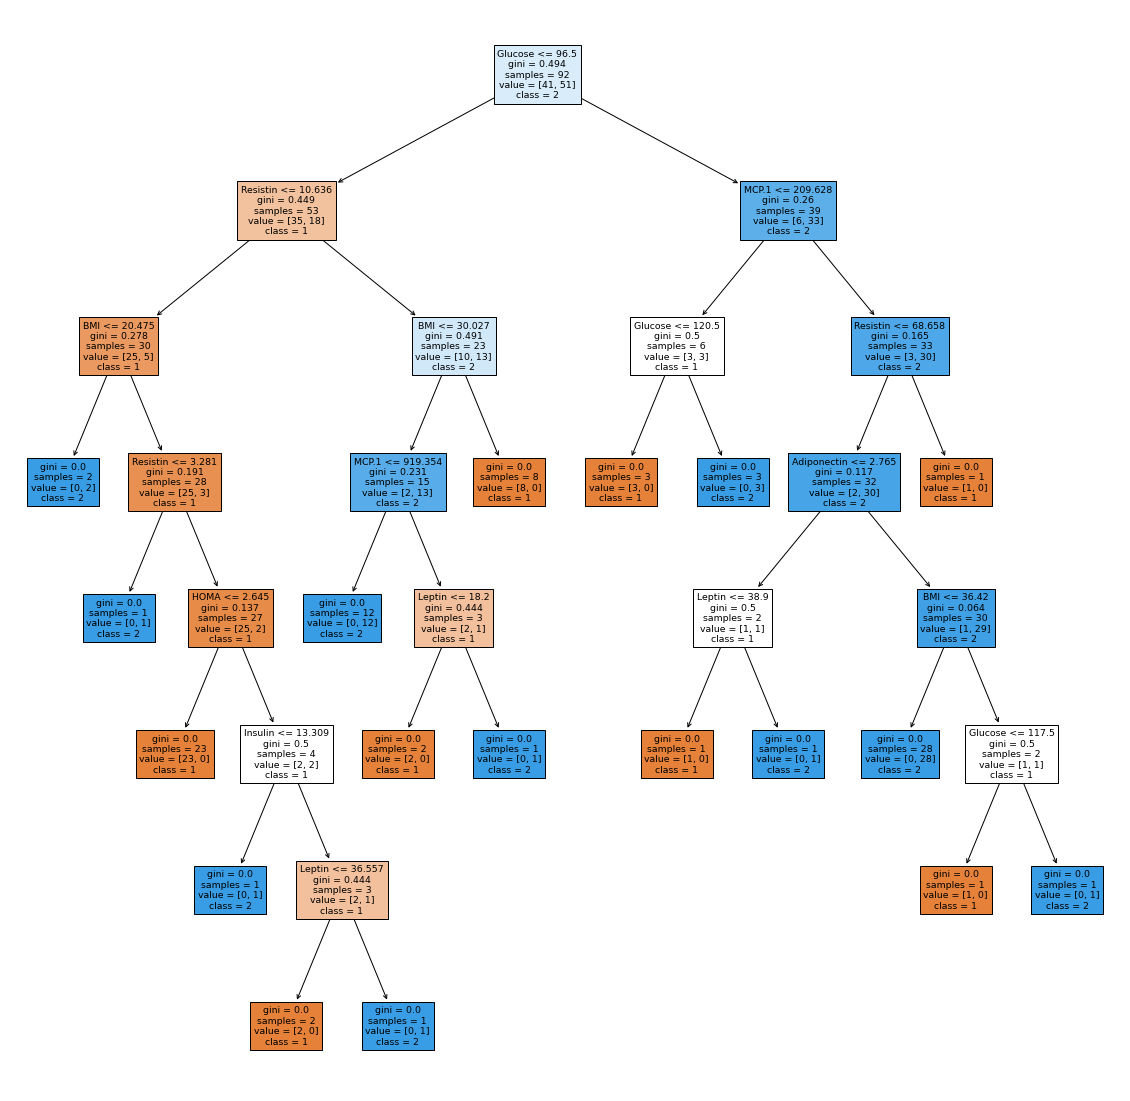

In [13]:
# plotting the tree

# creating a figure
plt.figure(figsize=(20,20))

plot_tree(clt,feature_names=data.columns, class_names=["1","2"],filled=True)
plt.show()

In [14]:
# check accuracy before pruning
y_pred=clt.predict(x_test)

In [17]:
accuracy_score(y_test,y_pred)

0.5833333333333334

In [18]:
confusion_matrix(y_test,y_pred)

array([[7, 4],
       [6, 7]])

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.54      0.64      0.58        11
           2       0.64      0.54      0.58        13

    accuracy                           0.58        24
   macro avg       0.59      0.59      0.58        24
weighted avg       0.59      0.58      0.58        24



### Pruning the tree
- limiting the tree to reduce overfitting

In [20]:
clt=DecisionTreeClassifier(max_depth=3,max_features=3)
clt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=3)

In [21]:
text_representation=export_text(clt)
print(text_representation)
# feature 1,2,3,4... -> features (cols) of the dataset

|--- feature_0 <= 39.00
|   |--- feature_3 <= 17.86
|   |   |--- class: 1
|   |--- feature_3 >  17.86
|   |   |--- class: 2
|--- feature_0 >  39.00
|   |--- feature_2 <= 96.50
|   |   |--- feature_7 <= 10.64
|   |   |   |--- class: 1
|   |   |--- feature_7 >  10.64
|   |   |   |--- class: 2
|   |--- feature_2 >  96.50
|   |   |--- feature_8 <= 209.63
|   |   |   |--- class: 1
|   |   |--- feature_8 >  209.63
|   |   |   |--- class: 2



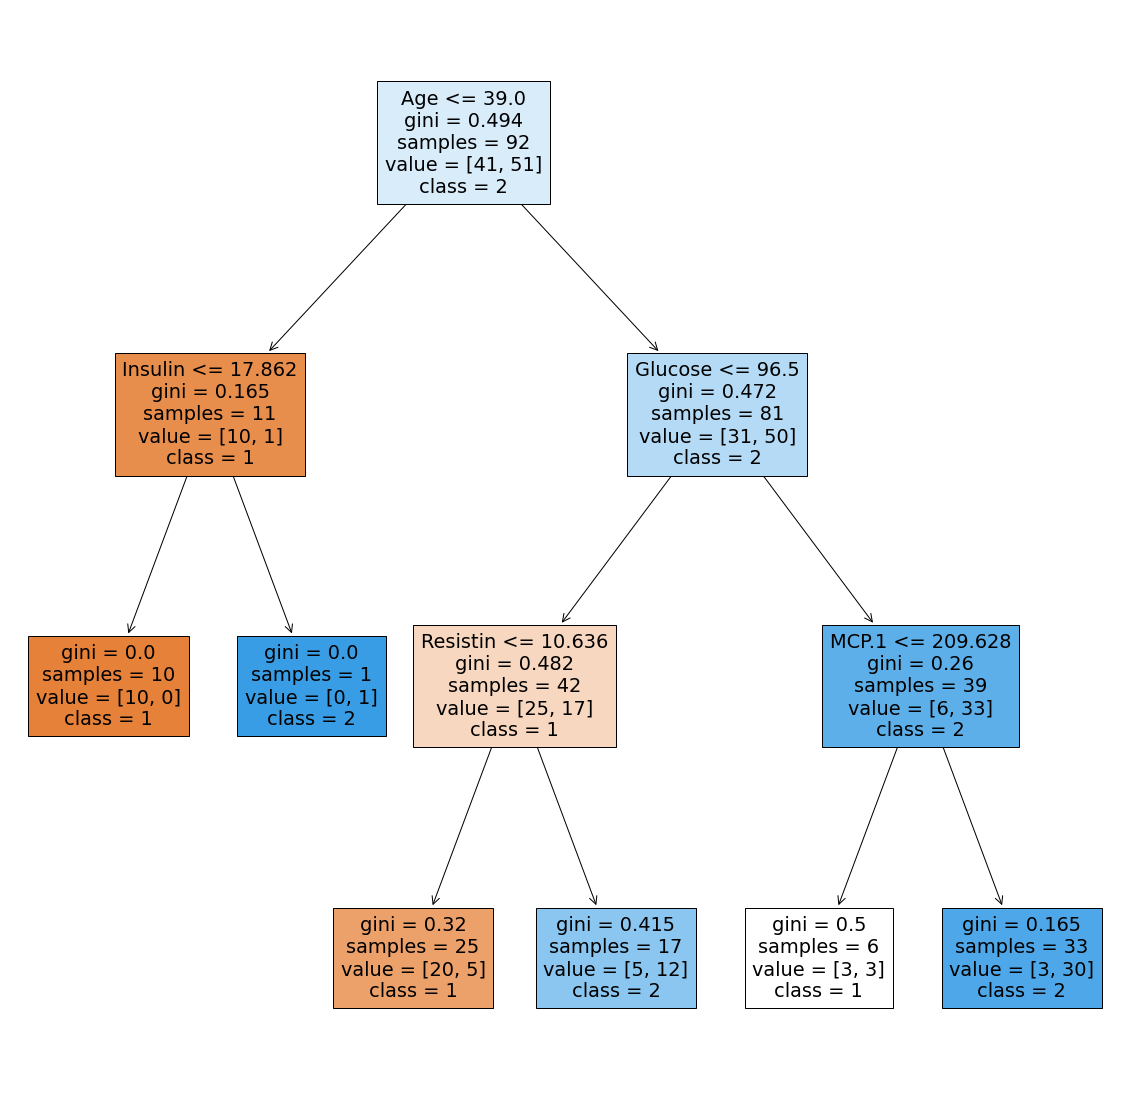

In [22]:
plt.figure(figsize=(20,20))
plot_tree(clt,feature_names=data.columns, class_names=["1","2"],filled=True)
plt.show()

# Decision tree Regression

In [31]:
data= pd.read_csv("Boston.csv")

In [32]:
x=data.iloc[:,:12].values
y=data.iloc[:,12].values

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
rgt=DecisionTreeRegressor(max_depth=3)

In [35]:
rgt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [36]:
text_representation=export_text(rgt)
print(text_representation)

|--- feature_11 <= 8.13
|   |--- feature_4 <= 7.44
|   |   |--- feature_4 <= 6.68
|   |   |   |--- value: [24.81]
|   |   |--- feature_4 >  6.68
|   |   |   |--- value: [32.49]
|   |--- feature_4 >  7.44
|   |   |--- feature_9 <= 18.30
|   |   |   |--- value: [46.42]
|   |   |--- feature_9 >  18.30
|   |   |   |--- value: [28.55]
|--- feature_11 >  8.13
|   |--- feature_11 <= 15.00
|   |   |--- feature_4 <= 6.60
|   |   |   |--- value: [20.97]
|   |   |--- feature_4 >  6.60
|   |   |   |--- value: [26.52]
|   |--- feature_11 >  15.00
|   |   |--- feature_0 <= 5.77
|   |   |   |--- value: [16.86]
|   |   |--- feature_0 >  5.77
|   |   |   |--- value: [11.86]



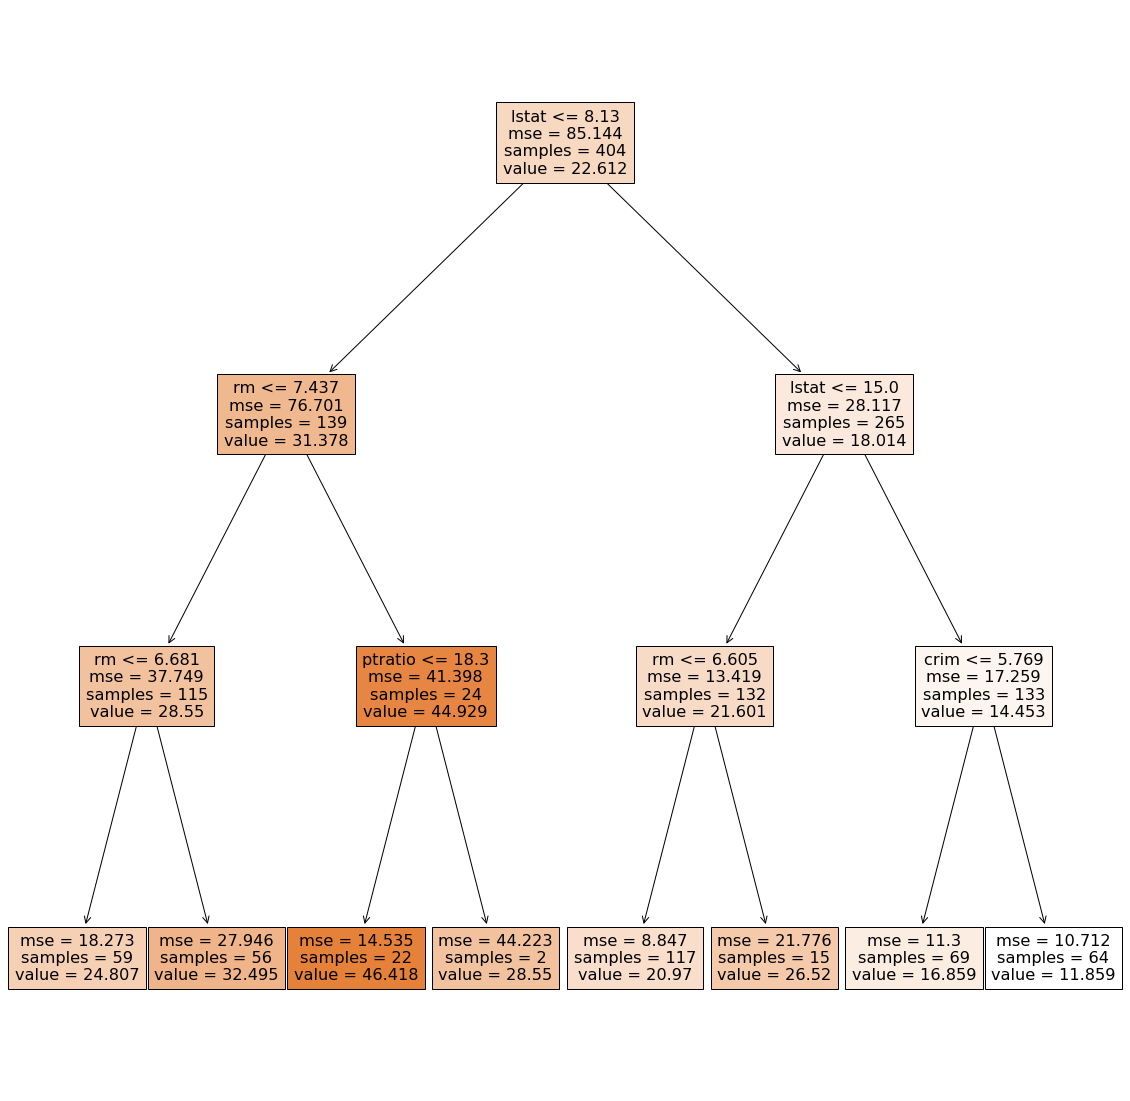

In [37]:
plt.figure(figsize=(20,20))
plot_tree(rgt,feature_names=data.columns,filled=True)
plt.show()

In [38]:
y_pred=rgt.predict(x_test)

In [40]:
# root mean squared erroro for ther model
err= np.sqrt(mean_squared_error(y_test,y_pred))

In [43]:
accuracy=100-err

In [44]:
accuracy

94.21975190025728